In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

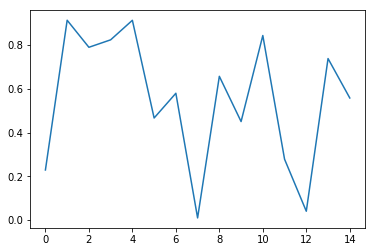

In [2]:
plt.plot(np.random.rand(15))

In [3]:
# voir PEP 8
x = np.arange(30)
vitesse = 1-np.exp(-x/2)
position = x-2*(1-np.exp(-x/2))

In [4]:
y = np.zeros(30)
z = np.zeros(30)

In [5]:
for j in np.arange(0, 12):
    y[8+j]=15*vitesse[j]

In [6]:
for j in np.arange(0, 14):
    z[8+j]=position[j]

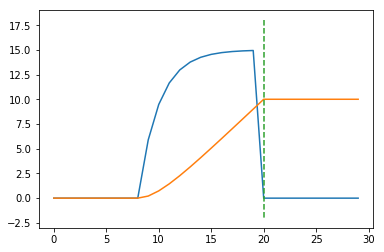

In [7]:


plt.plot(x, y)

z[21:30]=z[20]
        
plt.plot(x, z)

xx = [20,20]
yx = [18,-2]

plt.plot(xx, yx, "--", label="ligne --")



plt.show() # affiche la figure a l'ecran

In [138]:
R = 25

In [139]:
T = 25

In [10]:
def power(A,n):
    if n==0:
        return(np.eye(int(np.sqrt(np.size(A)))));
    else:
        return(A.dot(power(A,n-1)));


In [11]:
def expectation(A,B,x0,u,t):
    somme =  power(A,t).dot(x0)
    for i in np.arange(t):
        mat = power(A,t-i-1).dot(B)
        somme = somme + mat*u[i]
    return somme

In [12]:
def variance(A,B,k,u,t):
    somme = 0.
    for i in np.arange(t):
        ci0 = (power(A,t-i-1).dot(B))[0]
        somme = somme + k*ci0**2*u[i]**2
    return somme

In [13]:
def bias(A,B,x0,u,t,xT):
    mean = expectation(A,B,x0,u,t)
    somme = (mean[0]-xT[0])**2
    return somme

In [14]:
def cost(A,B,k,x0,u,xT):
    somme = 0
    for t in np.arange(R):
        var = variance(A,B,k,u,t+T)
        bia = bias(A,B,x0,u,t+T,xT)
        somme = somme + var + bia
    return somme

In [15]:
def costder(A,B,k,x0,u,xT,i):
    ci0_2 = 0;
    for t in np.arange(R):
        if i < T:
            ci0_2 = ci0_2 + ((power(A,T+t-i-1).dot(B))[0])**2
    somme = 2*ci0_2*k*R
    for t in np.arange(R):
        if i < T:
            ci0 = (power(A,t+T-i-1).dot(B))[0]
            somme = somme + 2*ci0*((expectation(A,B,x0,u,t+T))[0]-xT[0])
    return somme;

In [127]:
beta = 100

In [128]:
m = 1

In [130]:
A = np.array([[1.,1.],[0.,1-beta/m]])*0.001

In [149]:
A = np.array([[0,1],[9.26*0.092**2,0]])

In [150]:
A

array([[ 0.        ,  1.        ],
       [ 0.07837664,  0.        ]])

In [131]:
B = np.array([0.,1/m])*0.001

In [151]:
B = np.array([0,1])

In [20]:
x0 = np.array([0.,0.])

In [21]:
xT = np.array([10.,0.])

In [22]:
k = 0.001

In [23]:
niter = 10

In [24]:
eta = 0.5

In [25]:
u = np.random.uniform(-5,5,T+R)

In [26]:
u[T:(T+R)] = 0

In [27]:
u

array([ 1.51869848,  0.28136074,  2.85701427,  1.55815387, -2.94431237,
       -0.48885327,  1.49266667, -1.43338451, -4.12482911, -3.88110527,
       -4.91073612, -3.0589213 , -2.47439476, -2.12324882, -0.33878286,
        1.55441494,  3.69242193,  4.5607195 ,  3.77113807,  0.99923369,
       -3.79608357,  4.10506652,  2.1123003 ,  2.68881209,  0.61698008,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [28]:
a = np.zeros((niter+1,T+R));
a[0] = u;
for i in np.arange(niter):
    v = u;
    for j in np.arange(T):
        u[j] = v[j] - eta*(costder(A,B,k,x0,v,xT,j));
    a[i+1] = u;

In [29]:
u

array([ 62.43087406, -38.92509547,  28.09246505, -14.68478255,
         7.51054283,  -7.21817821,   5.82403361,  -4.22129262,
        -2.33037675,  -5.03611438,  -4.16730816,  -3.53743278,
        -2.16639821,  -2.32149249,  -0.21118223,   1.4722841 ,
         3.74528589,   4.52669332,   3.79303921,   0.9851369 ,
        -3.78701022,   4.0992216 ,   2.11587028,   2.67882568,
         0.29915373,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ])

In [30]:
plt.plot(utest)

plt.show()

NameError: name 'utest' is not defined

In [ ]:
y = np.zeros(niter);

for i in np.arange(niter):
    y[i] = (expectation(A,B,x0,a[i],T))[0];
    
plt.plot(y)
plt.show()

In [ ]:
y = np.zeros(T+R);

for i in np.arange(T+R):
    y[i] = (expectation(A,B,x0,u,i))[0];
    
plt.plot(y)
plt.show()

In [ ]:
expectation(A,B,x0,u,2)

In [ ]:
variance(A,B,k,u,7)

In [ ]:
bias(A,B,x0,u,7,xT)

In [ ]:
cost(A,B,k,x0,u,xT)

In [ ]:
eta*costder(A,B,k,x0,u,xT,59)

In [ ]:
ci0 = (power(A,7-3-1).dot(B))[0];

In [ ]:
ci0

In [ ]:
u[T] = u[T] + eta*(costder(A,B,k,x0,u,xT,T));

In [ ]:
b = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

In [ ]:
b

In [ ]:
b.dot(b)

In [ ]:
power(b,4)

In [ ]:
np.eye(7)

In [ ]:
a = np.arange(4)
b = np.transpose(np.array([a,a]))

In [ ]:
np.array([a,a])*np.array([2,2,2,2])

In [ ]:
a[1:3]

In [ ]:
a**2

In [ ]:
[expectation(x) for x in liste]

In [ ]:
np.flipud(b)

In [ ]:
a[1,2] = 2
sum(a)

In [ ]:
np.zeros((4,2))

In [ ]:
np.linspace(5, -5, 50)

In [ ]:
def dC(A,B,k,x0,u,xT):
    somme = 0;
    for t in (T+1+np.arange(R)):
        for i in np.arrange(t):
            ci0 = (power(A,t-i-1).dot(B))[0]; # to keep only the position term
            somme = somme + 2*k*ci0**2*u[i]*(u[i+1]-u[i]) + 2*ci0*(u[i+1]-u[i])*((expectation(A,B,x0,u,t))[0]-xT[0]); # bias terms
    return somme;

In [ ]:
def deriv(A,B,k,x0,u,xT,i):
    if u[i+1]-u[i] & i < T+R:
        return dC(A,B,k,x0,u,xT)/(u[i+1]-u[i])
    else:
        return 0;

In [ ]:
T+np.arange(R)

## mutable arrays

In [ ]:
u = np.arange(12, 17)
u

In [ ]:
new = u 

In [ ]:
new

In [ ]:
new[0] = 1
new

In [ ]:
u

In [ ]:
help(u)

In [ ]:
np.flipud(a) 

In [ ]:
np.transpose(B)

In [152]:
A.dot(B)

array([ 1.,  0.])

In [ ]:
beta/m/4

In [135]:
power(A,500).dot(B)

array([ 0.,  0.])

In [ ]:
1/beta

In [ ]:
np.ones((2,4))

In [ ]:
a = [1,0,2,2]

In [ ]:
sum(2*a[i] for i in np.arange(4))

In [154]:
def power(A, n): 
    """
    renvoie A puissance n où A est une matrice carrée
    
    See also: np.linalg.matrix_power
    
    """
    if n == 0:
        return(np.eye(int(np.sqrt(np.size(A)))))
    elif n == 1:
        return A
    else:
        if n % 2 == 0:
            A_half = power(A, n//2)
            return(A_half.dot(A_half))
        else:
            A_half = power(A, (n-1)//2)
            return(A.dot(A_half.dot(A_half)))


In [155]:
def A_pow(A):
    A_pow_array = np.zeros((T+R+1,2,2))

    for i in np.arange(T+R+1):
        A_pow_array[i] = power(A,i)
    return A_pow_array

In [156]:
A_pow_array = A_pow(A)

In [157]:
def pow_fast(n):
    return A_pow_array[n]

In [158]:
pow_fast(10)

array([[  2.95755757e-06,   0.00000000e+00],
       [  0.00000000e+00,   2.95755757e-06]])

In [ ]:
0.99**5

In [159]:
ci0_array = np.zeros(T+R+1)

for i in np.arange(T+R+1):
    ci0_array[i] = (pow_fast(i).dot(B))[0]

In [160]:
ci0_99 = np.zeros(T+R+1)

for i in np.arange(T+R+1):
    ci0_99[i] = 0.99**i

In [161]:
def variance99(u, t):
    somme = (m**2)*k*sum(np.flipud(ci0_99[0:t]*ci0_99[0:t])*u[0:t]*u[0:t])
    return somme

In [162]:
variance99(u,47)

NameError: name 'u' is not defined

In [163]:
u = np.array([  1.62098696e+00,   1.67164727e+00,   1.65241621e+00,
         1.64069265e+00,   1.60177339e+00,   1.60177127e+00,
         1.59316242e+00,   1.66421423e+00,   1.64090864e+00,
         1.65031292e+00,   1.58986529e+00,   1.67333505e+00,
         1.66124820e+00,   1.60672538e+00,   1.60404242e+00,
         1.60418130e+00,   1.61480600e+00,   1.63419478e+00,
         1.62603431e+00,   1.61366180e+00,   1.64185213e+00,
         1.60029482e+00,   1.61271761e+00,   1.57927931e+00,
        -1.45753727e-02,   8.82445076e-03,   3.44300566e-03,
         1.33673939e-03,   5.18635843e-04,   2.01089364e-04,
         7.79158630e-05,   3.01697900e-05,   1.16742157e-05,
         4.51431189e-06,   1.74446892e-06,   6.73662128e-07,
         2.59972643e-07,   1.00258034e-07,   3.86381322e-08,
         1.48805117e-08,   5.72695530e-09,   2.20258785e-09,
         8.46535526e-10,   3.25129319e-10,   1.24780313e-10,
         4.78391432e-11,   1.82839885e-11,   6.86747193e-12,
         2.27333197e-12,  -6.14318383e-14])

In [164]:
vari = np.zeros(T+R)

for i in np.arange(T+R):
    vari[i] = variance99(utest,i)
    
plt.plot(vari)
plt.show

NameError: name 'utest' is not defined

In [165]:
position = np.zeros(T+R);

for i in np.arange(T+R):
    position[i] = (expectation2(utest, i))[0];
    
plt.plot(position)
plt.show()

NameError: name 'expectation2' is not defined

In [166]:
speed = np.zeros(T+R)

for i in np.arange(T+R-1):
    speed[i] = (expectation2(utest, i+1))[1]
    
plt.plot(speed)
plt.show()

NameError: name 'expectation2' is not defined

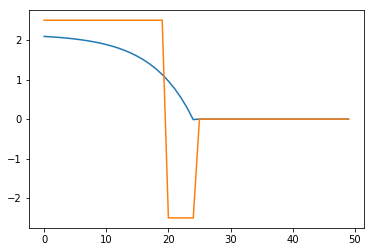

In [167]:
utest = np.zeros(T+R)

for i in np.arange(T):
    utest[i] = 2.15-0.008*np.exp(0.15*i+2)
    
utest2 = np.zeros(T+R)

for i in np.arange(T):
    utest2[i] = 2.5
utest2[T-5:T] = -2.5
    
plt.plot(utest)
plt.plot(utest2)
plt.show()

In [168]:
ci0_99

array([ 1.        ,  0.99      ,  0.9801    ,  0.970299  ,  0.96059601,
        0.95099005,  0.94148015,  0.93206535,  0.92274469,  0.91351725,
        0.90438208,  0.89533825,  0.88638487,  0.87752102,  0.86874581,
        0.86005835,  0.85145777,  0.84294319,  0.83451376,  0.82616862,
        0.81790694,  0.80972787,  0.80163059,  0.79361428,  0.78567814,
        0.77782136,  0.77004315,  0.76234271,  0.75471929,  0.74717209,
        0.73970037,  0.73230337,  0.72498034,  0.71773053,  0.71055323,
        0.70344769,  0.69641322,  0.68944909,  0.6825546 ,  0.67572905,
        0.66897176,  0.66228204,  0.65565922,  0.64910263,  0.6426116 ,
        0.63618549,  0.62982363,  0.62352539,  0.61729014,  0.61111724,
        0.60500607])

In [169]:
ci1_array = np.zeros(T+R+1)

for i in np.arange(T+R+1):
    ci1_array[i] = (pow_fast(i).dot(B))[1]

In [170]:
ci = np.array([ci0_array,ci1_array])

In [171]:
ci

array([[  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          7.83766400e-02,   0.00000000e+00,   6.14289770e-03,
          0.00000000e+00,   4.81459681e-04,   0.00000000e+00,
          3.77351921e-05,   0.00000000e+00,   2.95755757e-06,
          0.00000000e+00,   2.31803425e-07,   0.00000000e+00,
          1.81679736e-08,   0.00000000e+00,   1.42394472e-09,
          0.00000000e+00,   1.11604003e-10,   0.00000000e+00,
          8.74714677e-12,   0.00000000e+00,   6.85571973e-13,
          0.00000000e+00,   5.37328278e-14,   0.00000000e+00,
          4.21139850e-15,   0.00000000e+00,   3.30075264e-16,
          0.00000000e+00,   2.58701901e-17,   0.00000000e+00,
          2.02761858e-18,   0.00000000e+00,   1.58917931e-19,
          0.00000000e+00,   1.24554535e-20,   0.00000000e+00,
          9.76216595e-22,   0.00000000e+00,   7.65125766e-23,
          0.00000000e+00,   5.99679867e-24,   0.00000000e+00,
          4.70008931e-25,   0.00000000e+00,   3.68377208e-26,
        

In [ ]:
def expectation2(u, t):
    if t == 0:
        return x0
    else:
        somme =  pow_fast(t).dot(x0)
        somme += sum(np.transpose(ci[:,0:t]*np.flipud(u[0:t])))
        return somme

In [ ]:
def variance2(u, t):
    somme = np.array([(m**2)*k*sum(np.flipud(ci0_array[0:t]*ci0_array[0:t])*u[0:t]*u[0:t]),(m**2)*k*sum(np.flipud(ci1_array[0:t]*ci1_array[0:t])*u[0:t]*u[0:t])])
    return somme

In [ ]:
def bias2(u, t):
    mean = expectation2(u, t)
    result = (mean-xT)**2
    return result

In [ ]:
def cost2(u):
    somme = 0
    for t in (T+1+np.arange(R)):
        var = variance2(u, t)
        bia = bias2(u, t)
        somme += var[0] + bia[0] + var[1] + bia[1]
    somme += bias2(u,T)[0] + bias2(u,T)[1]
    return somme

In [ ]:
def cost3(u):
    return sum(sum(variance2(u, t)) + sum(bias2(u, t)) for t in (T+1+np.arange(R))) + sum(bias2(u,T))

In [ ]:
%%timeit
cost2(utest)

In [ ]:
%%timeit
cost3(utest)

In [ ]:
utest = 0.7963350789 * np.ones(T+R)
utest[(T-1):T] *= -1
utest[T:(T+R)] = 0
expectation2(utest, T)

In [99]:
w = 500*np.flipud(1/np.linspace(1,500,10))

In [100]:
w

array([   1.        ,    1.12471882,    1.28498001,    1.4985015 ,
          1.7971246 ,    2.24438903,    2.98804781,    4.46871897,
          8.85826772,  500.        ])

In [124]:
w2 = np.array([1.4,2.5,3.4,4.1,4.6,5,5.4,5.8,6.2,6.6])-0.1

In [121]:
w2

array([ 1.4,  2.3,  3.3,  4. ,  4.5,  4.9,  5.3,  5.7,  6.1,  6.5])

In [125]:
w3 = np.log(1+np.exp(w2)/2)

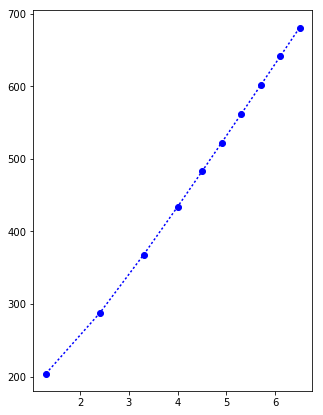

In [126]:
fig_width = 5
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width*1.4))

plt.plot(w2,100+100*w3,"b:o")
plt.show()

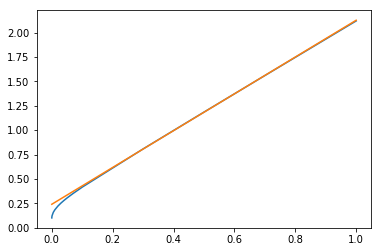

In [127]:
x = np.array([0.0000005,0.000005,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.02,0.03,0.04,0.05,0.07,0.1,0.3,0.5,0.7,1])
y = np.array([9.9956,9.9585,9.69276,9.49017,8.64413,8.08835,6.35500,5.46535,4.52218,3.96931,3.58235,3.28615,2.85099,2.40683,1.23859,0.84395,0.64121,0.47176])

plt.plot(x,1/y)

xx = np.linspace(0,1,18)

yy = 0.24+1/0.53*xx

plt.plot(xx,yy)


plt.show()

In [169]:
np.random.randn(2,2,2,2,2)

array([[[[[-0.45165261, -0.02274669],
          [-0.25105502,  0.38591322]],

         [[ 0.18466468,  0.65368689],
          [ 0.14716025, -0.41597533]]],


        [[[-0.46084144,  2.33838978],
          [-0.72000654,  1.60360161]],

         [[-0.86025298, -2.71064781],
          [ 0.36803435,  0.87468232]]]],



       [[[[-0.16918132, -0.42184097],
          [ 0.92329983, -1.28496916]],

         [[-1.34655794, -0.29996183],
          [ 0.90126117, -2.02863765]]],


        [[[-1.17690069,  0.20602095],
          [-1.93707349, -2.21289958]],

         [[-1.07669983,  0.02371854],
          [-0.20372854, -0.10296823]]]]])

In [153]:
a = np.array([1,2,3])

In [159]:
b = np.zeros((2,3))

In [171]:
b = np.asarray([a.tolist()]*3)

In [172]:
b

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [174]:
b @ a

array([14, 14, 14])

In [176]:
1.3**6

4.826809000000001

In [221]:
def tic(a,b):
    return np.sum(a+b)

In [237]:
a = np.array([1,2,3])

In [238]:
np.copy(a)

array([1, 2, 3])

In [217]:
np.sum(a,1)

array([6, 9])

In [216]:
np.apply_along_axis(tic, 1, (a,7))

ValueError: axis must be less than arr.ndim; axis=1, rank=1.

In [219]:
vfunc = np.vectorize(tic)

In [222]:
vfunc(a,np.array([-1,-1,-1]))

array([[0, 1, 2],
       [1, 2, 3]])

In [234]:
p = [1,2,3]

In [235]:
p.pop(1)

2

In [236]:
p

[1, 3]

In [241]:
np.array([0,0])

array([0, 0])

In [9]:
tau = 0.01
T = 0.05

In [191]:
rho = np.linspace(0.5,1,1001)

In [172]:
rho

array([ 0.875   ,  0.875001,  0.875002, ...,  0.875998,  0.875999,  0.876   ])

In [192]:
y = (11+20*tau*(1-np.exp((1-rho)*T/tau)))*(2-np.exp(-rho*T/tau)-np.exp((1-rho)*T/tau))+20*np.exp((1-rho)*T/tau)*((1-rho)*T+tau*(1-np.exp((1-rho)*T/tau)))-20*np.exp((1-rho)*T/tau)*(rho*T-tau*(1-np.exp(-rho*T/tau)))

In [22]:
rho

array([], dtype=float64)

In [28]:
npexp = np.vectorize(np.exp)

In [174]:
y

array([-0.06652638, -0.06641779, -0.06630919, ...,  0.04159188,
        0.04169995,  0.04180803])

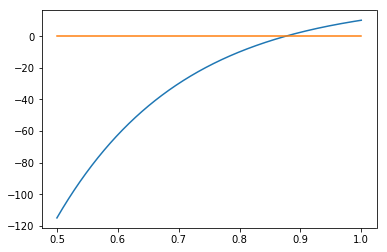

In [194]:
plt.plot(rho,y)
plt.plot([0.5,1],[0,0])
plt.show()

In [186]:
y[510:520]

array([ -1.40840484e-07,  -3.25655332e-08,   7.57094305e-08,
         1.83984378e-07,   2.92259326e-07,   4.00534274e-07,
         5.08809233e-07,   6.17084177e-07,   7.25359126e-07,
         8.33634074e-07])

In [187]:
rho[511]

0.87561351099999996

In [188]:
true_rho = 0.875613511

In [189]:
Umax = 100*20*np.exp((1-true_rho)*T/tau)/(2-np.exp(-true_rho*T/tau)-np.exp((1-true_rho)*T/tau))

In [190]:
Umax

29817.88442822358

In [16]:
rho = np.linspace(0.499,0.5,1001)

In [17]:
y = np.exp((2-rho)*T/tau)+np.exp(rho*T/tau)-np.exp((1+rho)*T/tau)-np.exp((1-rho)*T/tau)

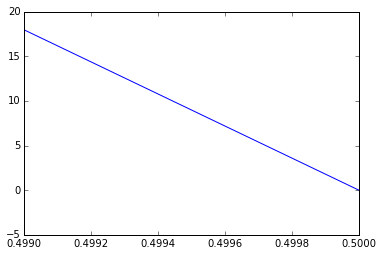

In [18]:
plt.plot(rho,y)

In [19]:
y[990:1000]

array([ 0.17958599,  0.16162739,  0.14366879,  0.12571019,  0.1077516 ,
        0.089793  ,  0.0718344 ,  0.0538758 ,  0.0359172 ,  0.0179586 ])